In [56]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [57]:
'''
random.seed(5)
for i in range(15):
    print(f'({random.randint(5,30)}, {random.randint(60,100)})')
    print(f'({random.randint(35,65)}, {random.randint(0,20)})')
    print(f'({random.randint(60,85)}, {random.randint(35,70)})')
'''

"\nrandom.seed(5)\nfor i in range(15):\n    print(f'({random.randint(5,30)}, {random.randint(60,100)})')\n    print(f'({random.randint(35,65)}, {random.randint(0,20)})')\n    print(f'({random.randint(60,85)}, {random.randint(35,70)})')\n"

In [58]:
random.seed(5) # Sample Input: https://www.desmos.com/calculator/lhttdsfzav
data = []
for i in range(15):
    data.append([random.randint(5,30), random.randint(60,100), 0])
    data.append([random.randint(25,65), random.randint(0,20), 0])
    data.append([random.randint(60,85), random.randint(35,70), 0])
size = 45
K = 3 # number of clusters

In [59]:
clusters = [] # initial clusters
random.seed(5)
for i in range(K):
    entry = random.randint(0, size-1)
    clusters.append([data[entry][0], data[entry][1]])

In [60]:
def assign_clusters():
    for i in range(len(data)):
        distance = math.dist(clusters[0], [data[i][0], data[i][1]])
        for j in range(K):
            if distance > math.dist(clusters[j], [data[i][0], data[i][1]]):
                distance = math.dist(clusters[j], [data[i][0], data[i][1]])
                data[i][2] = j

In [61]:
def compute_clusters(clusters):
    new_clusters = []
    radii = []
    for i in range(K):
        clustered_data = [point for point in data if point[2] == i]
        x_sum = sum([point[0] for point in clustered_data])
        y_sum = sum([point[1] for point in clustered_data])

        new_x = round(x_sum / len(clustered_data), 2)
        new_y = round(y_sum / len(clustered_data), 2)

        radius = sum([math.dist([point[0], point[1]], [new_x, new_y]) for point in clustered_data])/len(clustered_data)
        radii.append(round((radius), 2))

        new_clusters.append([new_x, new_y])
    return new_clusters, radii

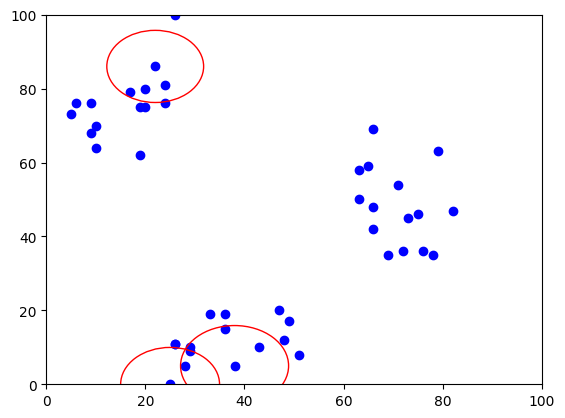

In [62]:
def plot_data():
    plt.clf()

    x = [point[0] for point in data]
    y = [point[1] for point in data]

    plt.xlim(0, 100)
    plt.ylim(0, 100)

    plt.scatter(x, y, color='blue', marker='o')
    for i in range(K):
        plt.gca().add_patch(plt.Circle((clusters[i][0], clusters[i][1]), radii[i], color='red', fill=False))


plot_data()

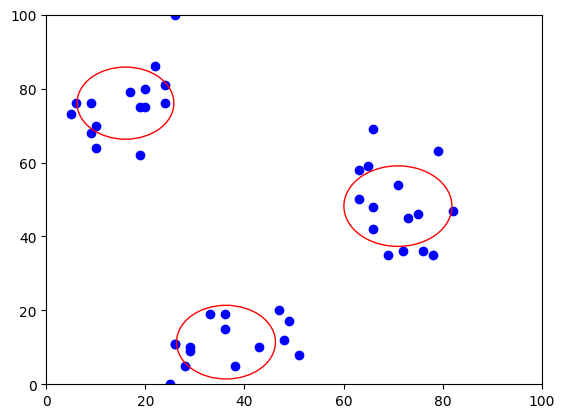

In [63]:
# static method
old_clusters = []
frame = 1
while clusters != old_clusters:
    assign_clusters()
    old_clusters = clusters
    clusters, radii = compute_clusters(clusters)
    plot_data()
    plt.savefig(f'plot_{frame}.png')
    frame += 1

In [64]:
images = [imageio.imread(f) for f in ['plot_1.png', 'plot_2.png', 'plot_3.png', 'plot_4.png']]
imageio.mimsave('output.gif', images, fps=2)


<ipython-input-64-8347ae6c9db6>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(f) for f in ['plot_1.png', 'plot_2.png', 'plot_3.png', 'plot_4.png']]
